In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# load the uber dataset
df=pd.read_csv("C:\\Users\\Sayali\\Downloads\\UberDataset.csv")
df

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [3]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [4]:
# Display Basic imformation about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [5]:
# Summary statistics
print(df.describe())

              MILES
count   1156.000000
mean      21.115398
std      359.299007
min        0.500000
25%        2.900000
50%        6.000000
75%       10.400000
max    12204.700000


In [6]:
# Data claning and preprocessing
# Removing missing values

uber_data=df.dropna()

In [7]:
print("Data Info After Conversion:")
print(df.info())

Data Info After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [8]:
# Convert date columns to datetime with inferred format and handling errors
df['START_DATE'] = pd.to_datetime(df['START_DATE'], infer_datetime_format=True, errors='coerce')
df['END_DATE'] = pd.to_datetime(df['END_DATE'], infer_datetime_format=True, errors='coerce')

C:\Users\Sayali\AppData\Local\Temp\ipykernel_9828\282720986.py:2: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['START_DATE'] = pd.to_datetime(df['START_DATE'], infer_datetime_format=True, errors='coerce')
C:\Users\Sayali\AppData\Local\Temp\ipykernel_9828\282720986.py:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['END_DATE'] = pd.to_datetime(df['END_DATE'], infer_datetime_format=True, errors='coerce')


In [9]:
# Impute missing dates with the mean or median
start_date_mean = df['START_DATE'].mean()
end_date_mean = df['END_DATE'].mean()

df['START_DATE'].fillna(start_date_mean, inplace=True)
df['END_DATE'].fillna(end_date_mean, inplace=True)

In [10]:
print("Data Info After Conversion:")
print(df.info())

Data Info After Conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1156 non-null   datetime64[ns]
 1   END_DATE    1156 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB
None


In [11]:
# Extract date-related features
df['START_DAY'] = df['START_DATE'].dt.day_name()
df['END_DAY'] = df['END_DATE'].dt.day_name()

In [12]:
# Calculate duration of the trip
df['DURATION_MINUTES'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [13]:
# Calculate duration of the trip
df['DURATION_MINUTES'] = (df['END_DATE'] - df['START_DATE']).dt.total_seconds() / 60

In [14]:
# Display the cleaned dataset
print("\nCleaned Dataset:")
print(df.head())


Cleaned Dataset:
           START_DATE            END_DATE  CATEGORY        START  \
0 2016-01-01 21:11:00 2016-01-01 21:17:00  Business  Fort Pierce   
1 2016-01-02 01:25:00 2016-01-02 01:37:00  Business  Fort Pierce   
2 2016-01-02 20:25:00 2016-01-02 20:38:00  Business  Fort Pierce   
3 2016-01-05 17:31:00 2016-01-05 17:45:00  Business  Fort Pierce   
4 2016-01-06 14:42:00 2016-01-06 15:49:00  Business  Fort Pierce   

              STOP  MILES          PURPOSE  START_DAY    END_DAY  \
0      Fort Pierce    5.1   Meal/Entertain     Friday     Friday   
1      Fort Pierce    5.0              NaN   Saturday   Saturday   
2      Fort Pierce    4.8  Errand/Supplies   Saturday   Saturday   
3      Fort Pierce    4.7          Meeting    Tuesday    Tuesday   
4  West Palm Beach   63.7   Customer Visit  Wednesday  Wednesday   

   DURATION_MINUTES  
0               6.0  
1              12.0  
2              13.0  
3              14.0  
4              67.0  


Exploratory Data Analysis¶

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

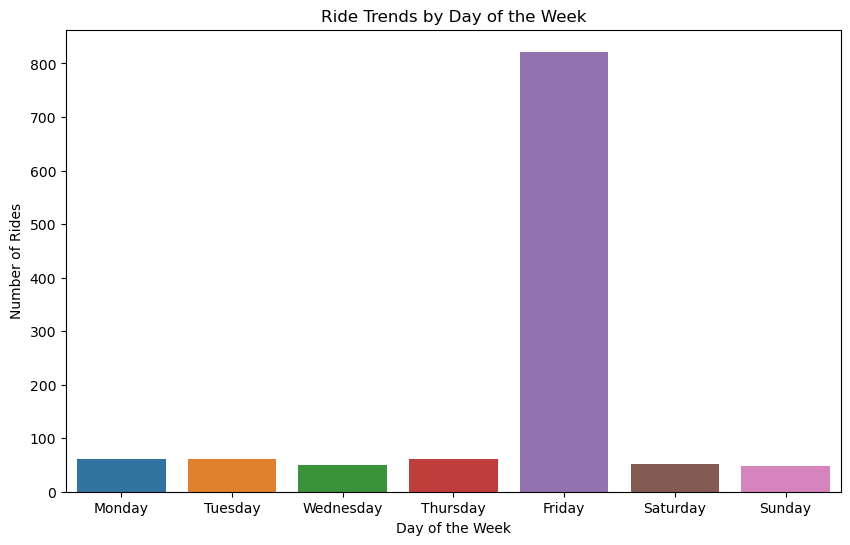

In [16]:
# Day of the week analysis
day_of_week_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(10, 6))
sns.countplot(x='START_DAY', data=df, order=day_of_week_order)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.title('Ride Trends by Day of the Week')
plt.show()


C:\Users\Sayali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


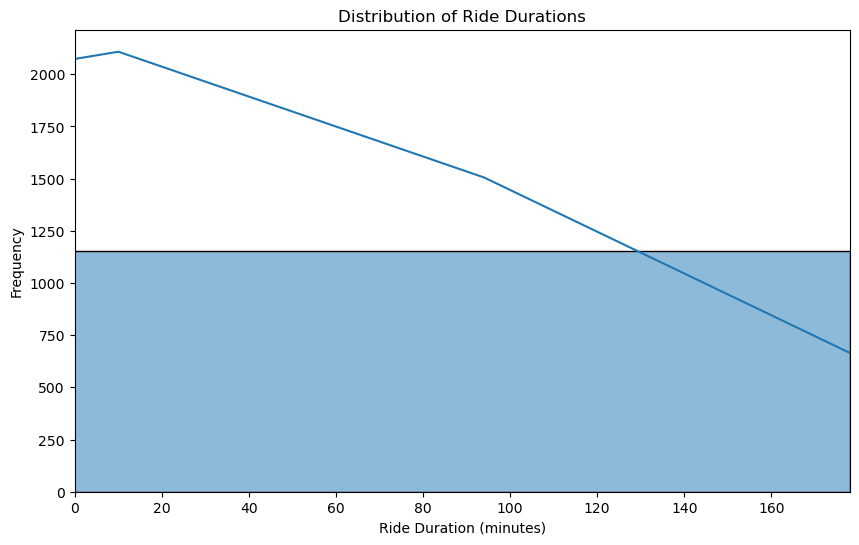

In [17]:
# Duration analysis without negative values
plt.figure(figsize=(10, 6))
sns.histplot(df['DURATION_MINUTES'], bins=30, kde=True)
plt.title('Distribution of Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')

# Set x-axis limit to exclude negative values
plt.xlim(0, df['DURATION_MINUTES'].max())

plt.show()

Time Based Analysis

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Convert 'START_DATE' to datetime format
df['START_DATE'] = pd.to_datetime(df['START_DATE'])

In [20]:
# Extract information about the month, day, and hour
df['Month'] = df['START_DATE'].dt.month
df['Day'] = df['START_DATE'].dt.day
df['Hour'] = df['START_DATE'].dt.hour

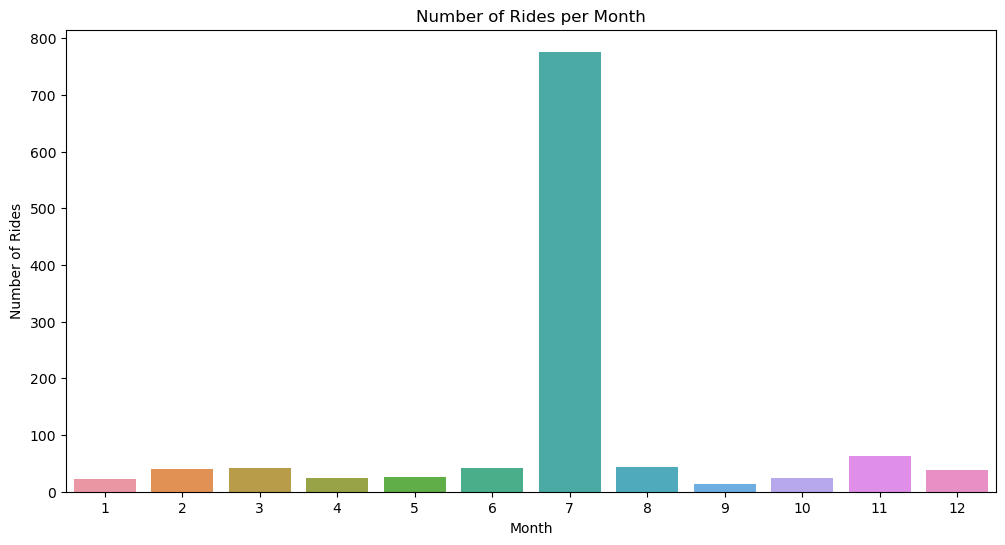

In [21]:
# Plot the number of rides per month
plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df)
plt.title('Number of Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

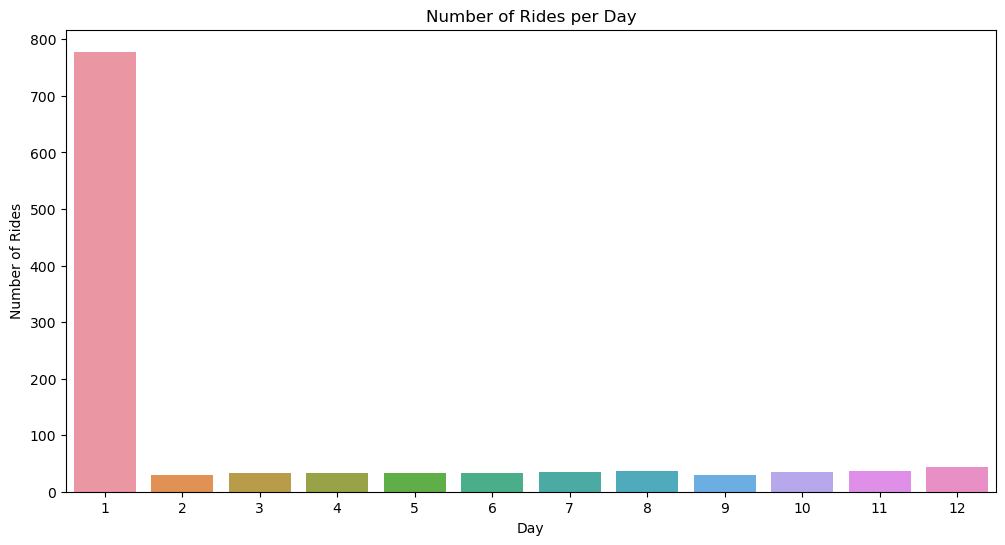

In [22]:
# Plot the number of rides per day
plt.figure(figsize=(12, 6))
sns.countplot(x='Day', data=df)
plt.title('Number of Rides per Day')
plt.xlabel('Day')
plt.ylabel('Number of Rides')
plt.show()

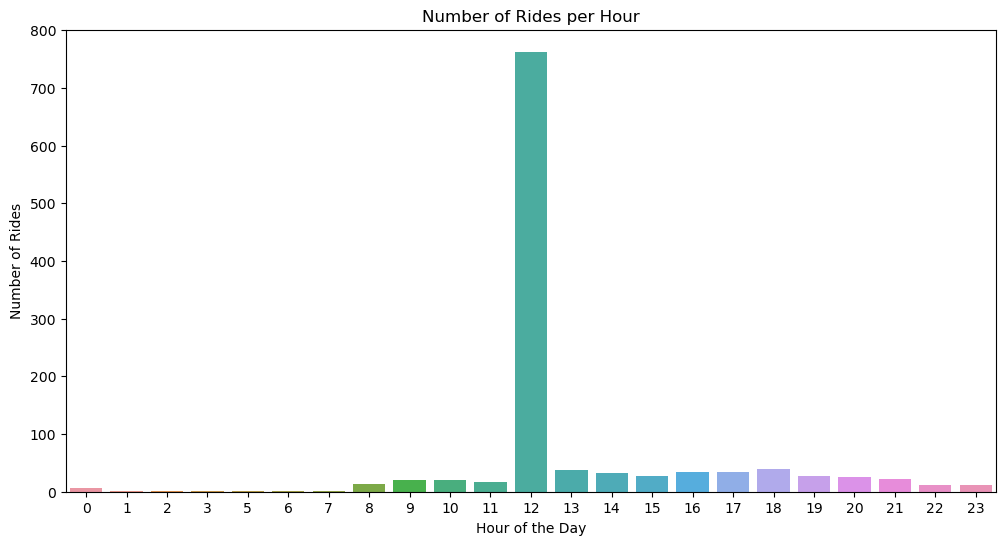

In [23]:
# Plot the number of rides per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Number of Rides per Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

Categorical Analysis

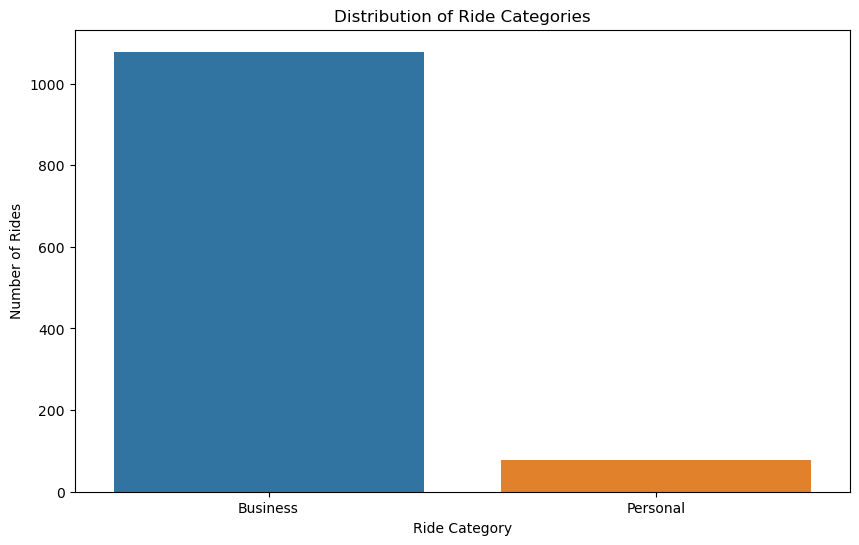

In [24]:
# Plot the distribution of ride categories
plt.figure(figsize=(10, 6))
sns.countplot(x='CATEGORY', data=df, order=df['CATEGORY'].value_counts().index)
plt.title('Distribution of Ride Categories')
plt.xlabel('Ride Category')
plt.ylabel('Number of Rides')
plt.show()


Purpose Analysis:

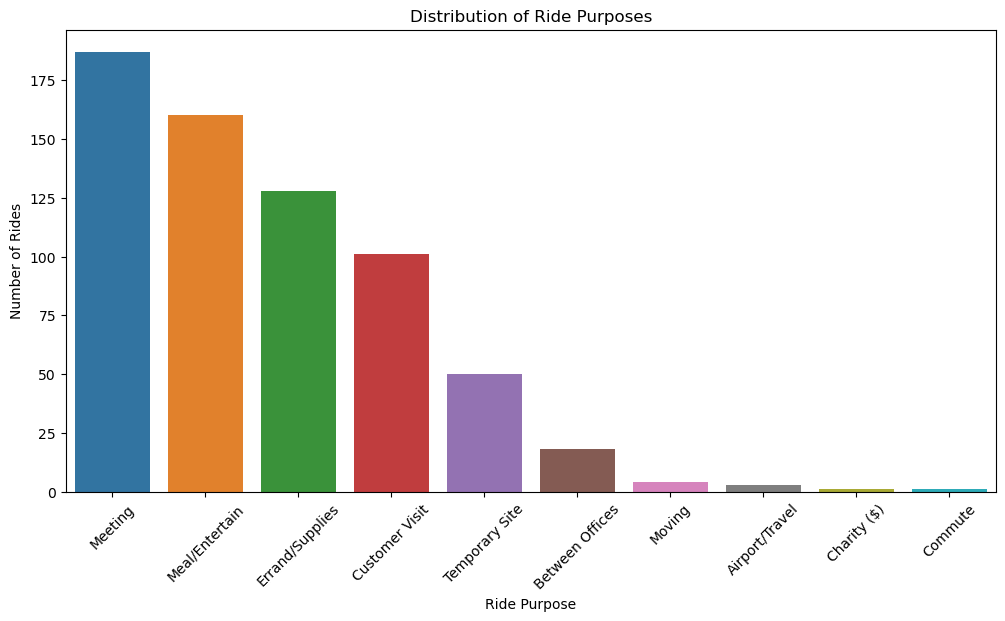

In [25]:
# Plot the distribution of ride purposes
plt.figure(figsize=(12, 6))
sns.countplot(x='PURPOSE', data=df, order=df['PURPOSE'].value_counts().index)
plt.title('Distribution of Ride Purposes')
plt.xlabel('Ride Purpose')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

Duration Analysis

C:\Users\Sayali\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


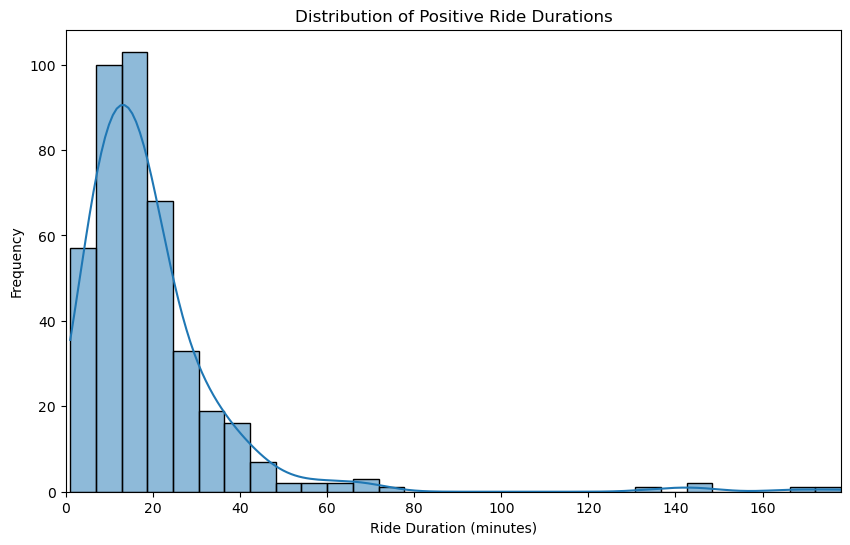

In [26]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['DURATION_MINUTES'] > 0]['DURATION_MINUTES']

# Distribution of positive ride durations in minutes
plt.figure(figsize=(10, 6))
sns.histplot(positive_durations, bins=30, kde=True)
plt.title('Distribution of Positive Ride Durations')
plt.xlabel('Ride Duration (minutes)')
plt.ylabel('Frequency')
plt.xlim(0, positive_durations.max())  # Set the x-axis range
plt.show()

Ride duration against distance

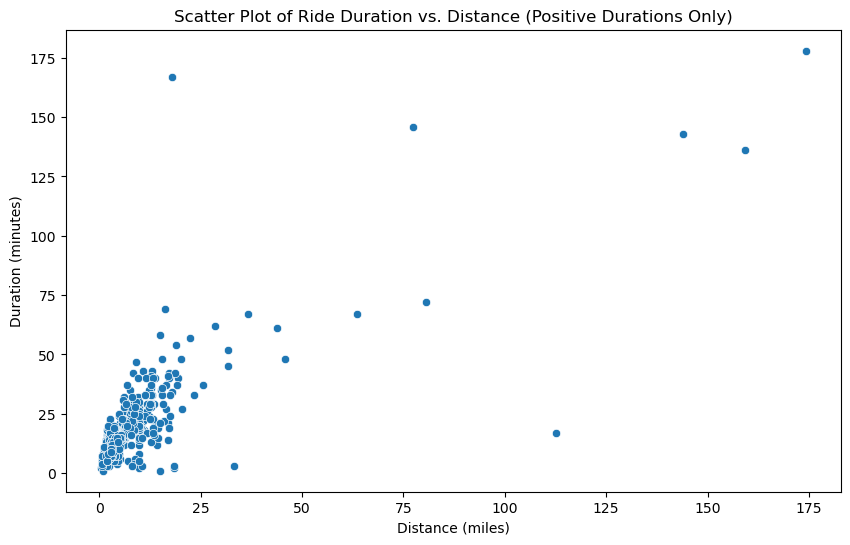

In [27]:
# Filter out rides with a duration greater than 0
positive_durations = df[df['DURATION_MINUTES'] > 0]

# Scatter plot of ride duration against distance
plt.figure(figsize=(10, 6))
sns.scatterplot(x='MILES', y='DURATION_MINUTES', data=positive_durations)
plt.title('Scatter Plot of Ride Duration vs. Distance (Positive Durations Only)')
plt.xlabel('Distance (miles)')
plt.ylabel('Duration (minutes)')
plt.show()

Frequency of rides per purpose

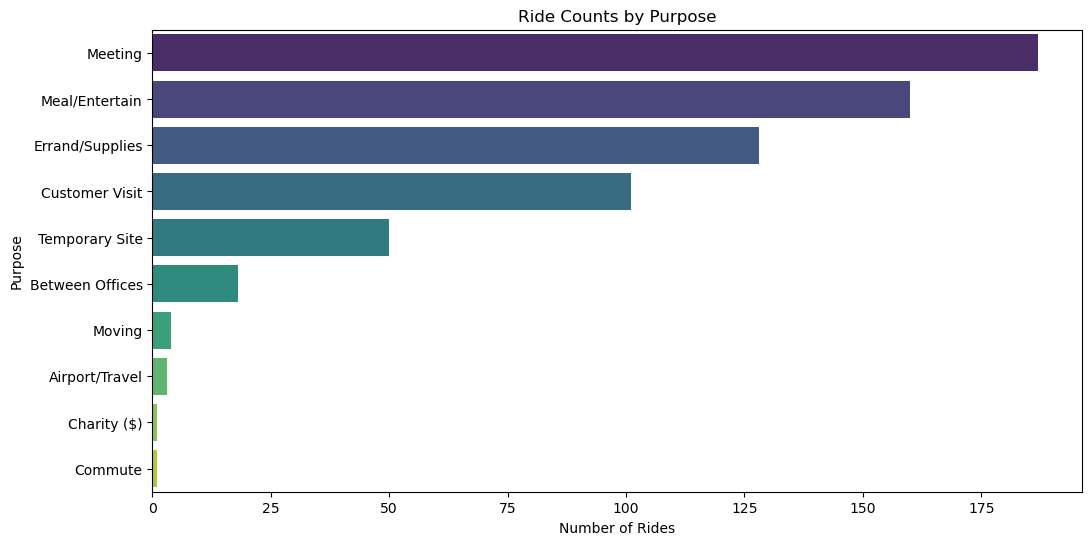

In [28]:
ride_purpose_counts = df['PURPOSE'].value_counts()

# Plot the distribution of ride counts per purpose
plt.figure(figsize=(12, 6))
sns.barplot(x=ride_purpose_counts.values, y=ride_purpose_counts.index, palette='viridis')
plt.title('Ride Counts by Purpose')
plt.xlabel('Number of Rides')
plt.ylabel('Purpose')
plt.show()

Peak ride times

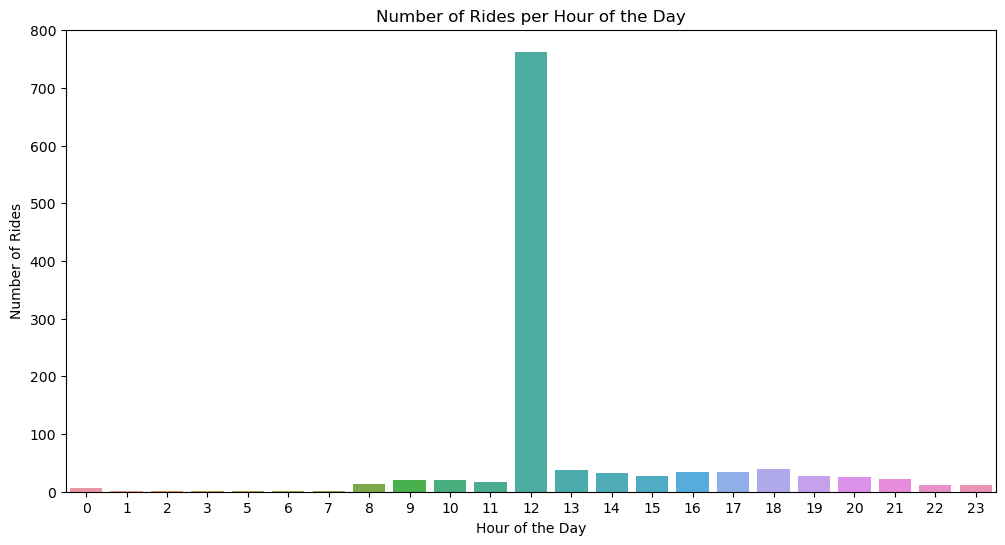

In [29]:
df['Hour'] = df['START_DATE'].dt.hour

# Plot the number of rides per hour
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=df)
plt.title('Number of Rides per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

Popular destinations

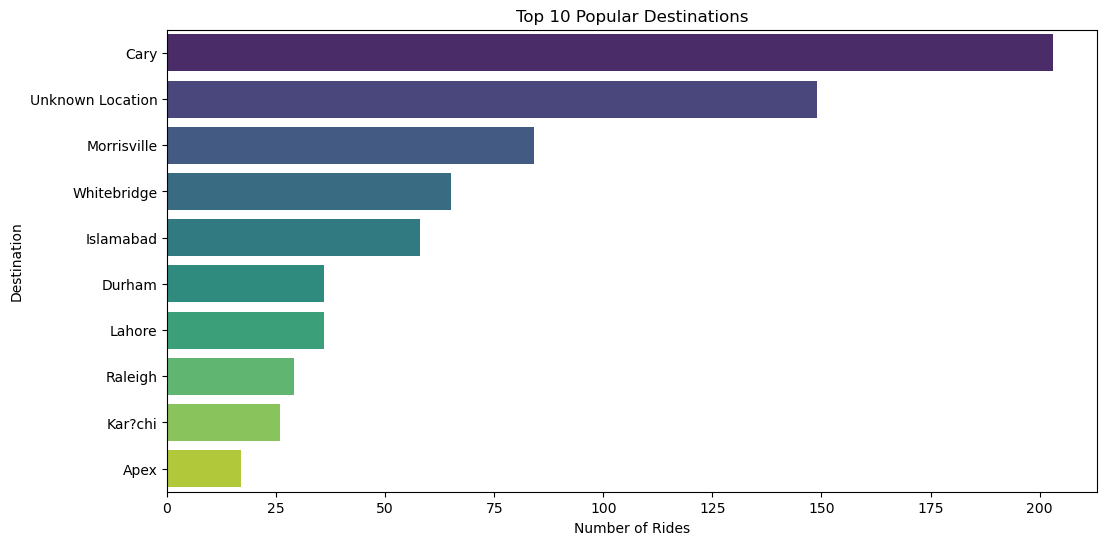

In [30]:
popular_destinations = df['STOP'].value_counts().head(10)

# Plot the top 10 popular destinations
plt.figure(figsize=(12, 6))
sns.barplot(x=popular_destinations.values, y=popular_destinations.index, palette='viridis')
plt.title('Top 10 Popular Destinations')
plt.xlabel('Number of Rides')
plt.ylabel('Destination')
plt.show()

#Exploration of Missing Values

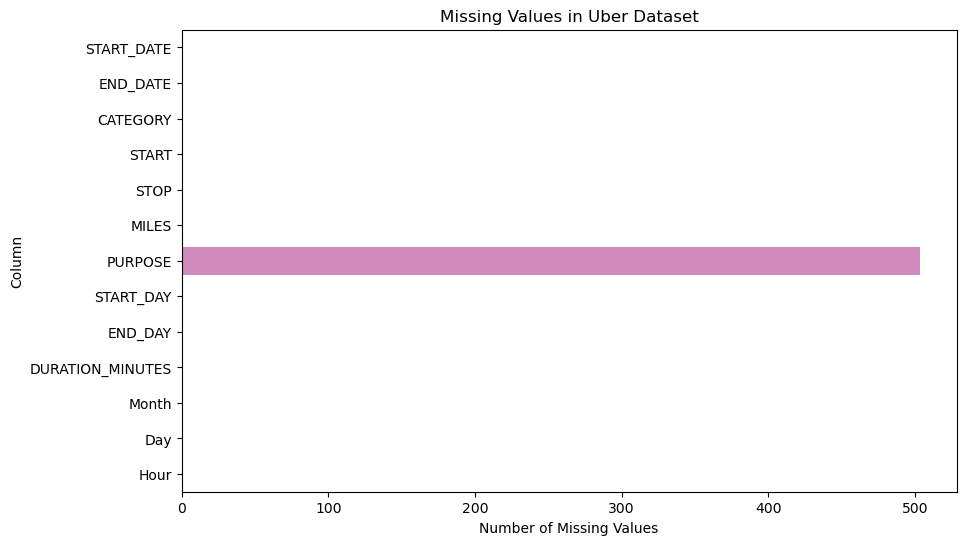

In [31]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()

# Plot the missing values using a bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.values, y=missing_values.index, palette='muted')
plt.title('Missing Values in Uber Dataset')
plt.xlabel('Number of Missing Values')
plt.ylabel('Column')
plt.show()

Correlation Analysis

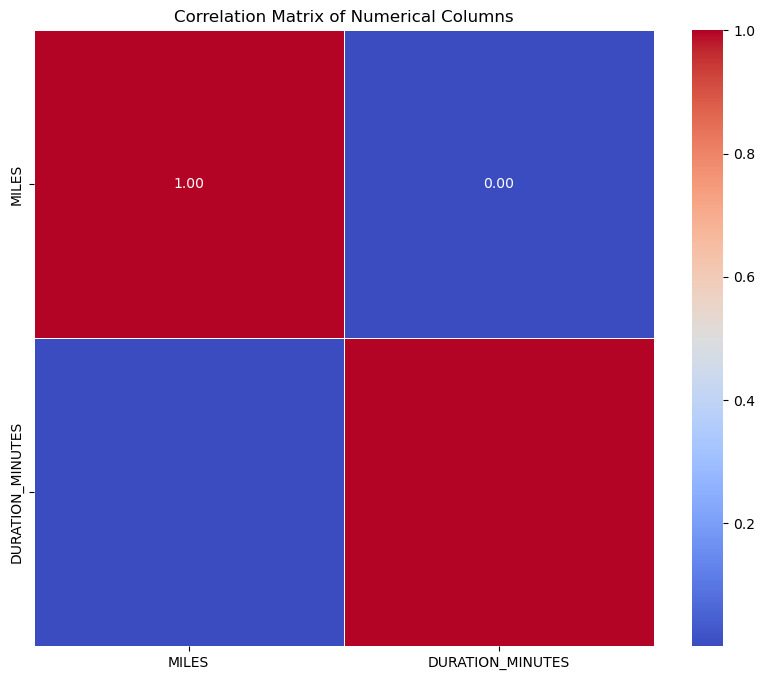

In [32]:
# Selecting numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = df[numerical_columns].corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Columns')
plt.show()